In [1]:
# libraries used
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# width   &  length apple 
# width   &  length banana

np.random.seed(121)

N = 1000     # number of apple and banana
std = 0.6    #standard deviation

# 
bananas = pd.DataFrame({
    'length': np.random.normal(8, std, N),
    'width': np.random.normal(4, std, N),
    'class': np.zeros(N, dtype='int')}          #banana class   0
)

apples = pd.DataFrame({
    'length': np.random.normal(6, std, N),
    'width': np.random.normal(6, std, N),
    'class': np.ones(N, dtype='int')}            #apple class 1
)

fruits = pd.concat([bananas, apples])

In [3]:
bananas.head(10)

,length,width,class
0,7.872780,3.756298,0
1,7.829042,3.954792,0
2,7.655661,4.182660,0
3,7.735814,3.209214,0
4,7.801934,4.040239,0
5,8.710217,3.617070,0
6,8.969224,4.127500,0
7,8.220237,3.507345,0
8,7.991528,4.053815,0
9,8.377785,4.688682,0


In [4]:
apples.head(10)

,length,width,class
0,6.280259,7.291050,1
1,6.310156,6.772268,1
2,5.996524,4.920935,1
3,5.108846,6.013289,1
4,6.454588,6.774234,1
5,6.137923,6.421493,1
6,5.549992,5.818629,1
7,6.385736,5.666980,1
8,6.096426,5.003788,1
9,5.832869,5.903455,1


Text(0, 0.5, 'Width')

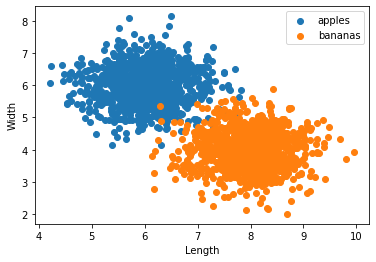

In [6]:
# Scatter plot
plt.scatter(x=apples['length'], y=apples['width'], label='apples')
plt.scatter(x=bananas['length'], y=bananas['width'], label='bananas')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Width')

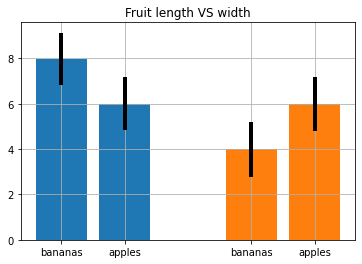

In [7]:
# Bar chart with error bars
labels = ['bananas', 'apples', 'bananas', 'apples']
x = [1, 1.5, 2.5, 3.0]
height = [fruits.loc[fruits['class'] == 0, 'length'].mean(),
          fruits.loc[fruits['class'] == 1, 'length'].mean(),
          fruits.loc[fruits['class'] == 0, 'width'].mean(),
          fruits.loc[fruits['class'] == 1, 'width'].mean()]
yerr = [2*fruits.loc[fruits['class'] == 0, 'length'].std(),
        2*fruits.loc[fruits['class'] == 1, 'length'].std(),
        2*fruits.loc[fruits['class'] == 0, 'width'].std(),
        2*fruits.loc[fruits['class'] == 1, 'width'].std()]
color = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']

plt.bar(x=x,
        height=height,
        color=color,
        width=0.4,
        error_kw={'lw': 4},
        yerr=yerr)
plt.xticks(ticks=x, labels=labels)
plt.title('Fruit length VS width')

plt.grid()

Text(0.5, 1.0, 'Length Distribution ')

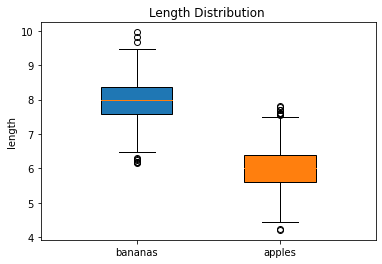

In [8]:
# Box diagram                #differences in the length
fea = 'length'
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 0],
            patch_artist=True, boxprops={'facecolor': 'tab:blue'},
            positions=[0], labels=['bananas'], widths=[0.15])
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 1],
            patch_artist=True, boxprops={'facecolor': 'tab:orange'},
            positions=[0.3], labels=['apples'], widths=[0.15])
plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution ')

Text(0.5, 0, 'Width')

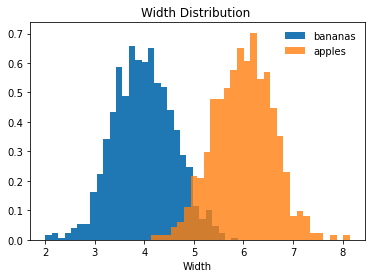

In [9]:
# histogram                # the width of two types of fruits presents two different distributions, but some areas overlap   => banana > apple 
fea = 'width'

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples', alpha=0.8)
plt.legend(frameon=False)
plt.title('Width Distribution ')
plt.xlabel('Width')

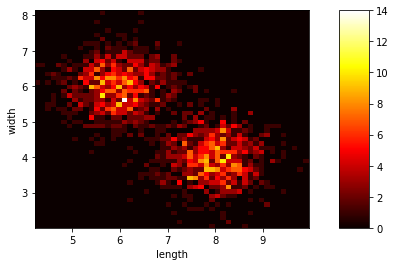

In [11]:
# Joint distribution histogram          # The yellow part indicates that the sample density of the region is large, and the black part indicates that the sample density of the region is small.
fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d(
    x='length', y='width', bins=50, data=fruits, cmap=plt.cm.hot)
ax.set_xlabel('length')
ax.set_ylabel('width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)

Text(0.5, 0, 'L/W ratio')

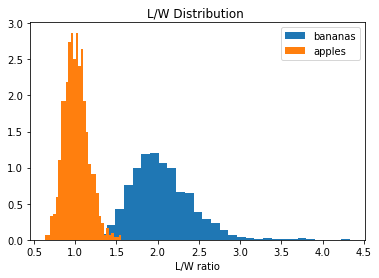

In [12]:
# ratio of length to width is a good feature to separate the distribution of banana and fruit, and the overlapping area is very small.
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples',)
plt.legend()
plt.title('L/W Distribution ')
plt.xlabel('L/W ratio')

Text(0.5, 0, 'Area')

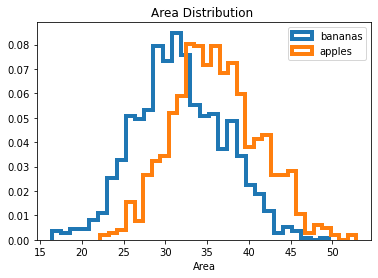

In [13]:
# the measure of area      #multiplying the fruit length by the fruit width
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('Area Distribution ')
plt.legend()
plt.xlabel('Area')

Text(0.5, 0, 'Circumference')

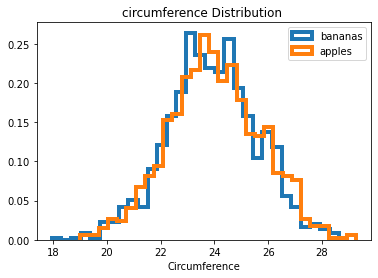

In [14]:
# Perimeter     # adding the length of the fruit to the width of the fruit and multiplying by 2. 
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('circumference Distribution ')
plt.legend()
plt.xlabel('Circumference')

In [15]:
from scipy import stats

In [16]:
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=82.438425661083, pvalue=0.0)

In [17]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-18.33979554877528, pvalue=1.4737736564093967e-69)

In [18]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])


Ttest_indResult(statistic=-1.3170522756675043, pvalue=0.18797213126930964)